<a href="https://colab.research.google.com/github/jannat0718/Tensorflow-Tutorial/blob/main/TensorFlow_Tutorial_7_%26_18_More_in_Depth_Example_on_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Dependecies,Load and preprocess data

###1.1. Import Libraries

In [ ]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import os
import glob
import io
import cv2
from google.colab.patches import cv2_imshow

###1.2. Dataset Download and  unzip


1.   Download the dataset from the given github repo:https://github.com/shaohua0116/MultiDigitMNIST#datasets
2.   Upload into the google drive and unzip 
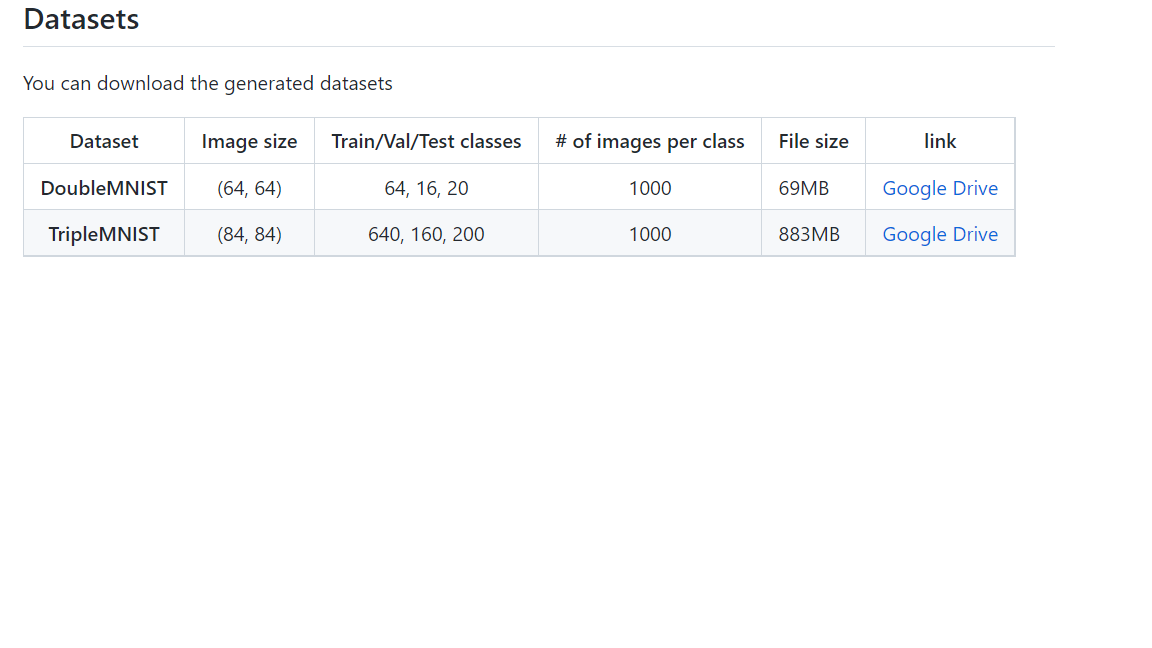



In [ ]:
from zipfile import ZipFile
file='/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/archive.zip'
with ZipFile(file,'r') as zip:
  zip.printdir()
  print('processing...........')
  zip.extractall('/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/Acrhaive_Extracted')
  print("Process completed!")

Streaming output truncated to the last 5000 lines.
train_images/246_16.png                        2020-08-13 12:14:36          377
train_images/246_18.png                        2020-08-13 12:14:36          371
train_images/246_19.png                        2020-08-13 12:14:36          375
train_images/246_20.png                        2020-08-13 12:14:36          538
train_images/246_21.png                        2020-08-13 12:14:36          359
train_images/246_23.png                        2020-08-13 12:14:36          558
train_images/246_24.png                        2020-08-13 12:14:36          572
train_images/246_26.png                        2020-08-13 12:14:36          459
train_images/246_28.png                        2020-08-13 12:14:36          585
train_images/246_29.png                        2020-08-13 12:14:36          476
train_images/246_30.png                        2020-08-13 12:14:36          531
train_images/246_31.png                        2020-08-13 12:14:36   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
train_images/92_90.png                         2020-08-13 12:14:58          532
train_images/92_91.png                         2020-08-13 12:14:58          389
train_images/92_94.png                         2020-08-13 12:14:58          475
train_images/92_95.png                         2020-08-13 12:14:58          438
train_images/92_97.png                         2020-08-13 12:14:58          462
train_images/92_98.png                         2020-08-13 12:14:58          459
train_images/930_00.png                        2020-08-13 12:14:58          579
train_images/930_01.png                        2020-08-13 12:14:58          399
train_images/930_04.png                        2020-08-13 12:14:58          519
train_images/930_05.png                        2020-08-13 12:14:58          556
train_images/930_06.png                        2020-08-13 12:14:58          528
train_images/930_08.png                        2020-08-13 12:14:58   

###1.3. Set the Directories

In [ ]:
# Set directories
Image_DIR='/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/Acrhaive_Extracted/'

###1.4. Hyperparameter setting

In [ ]:
#Hyper parameter
Batch_size=64
WEIGHT_DECAY=0.001
LEARNING_RATE=3e-4

img_height=64
img_weight=64


###1.5.1. Load Train labels and Image data

In [ ]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64/train/',
    labels='inferred',
    label_mode="int",
    color_mode='grayscale',
    batch_size=Batch_size,
    image_size=(img_height,img_weight),
    shuffle=True,
    seed=123,   
)

Found 64000 files belonging to 64 classes.


###1.5.2. Image visualization from Training databatch


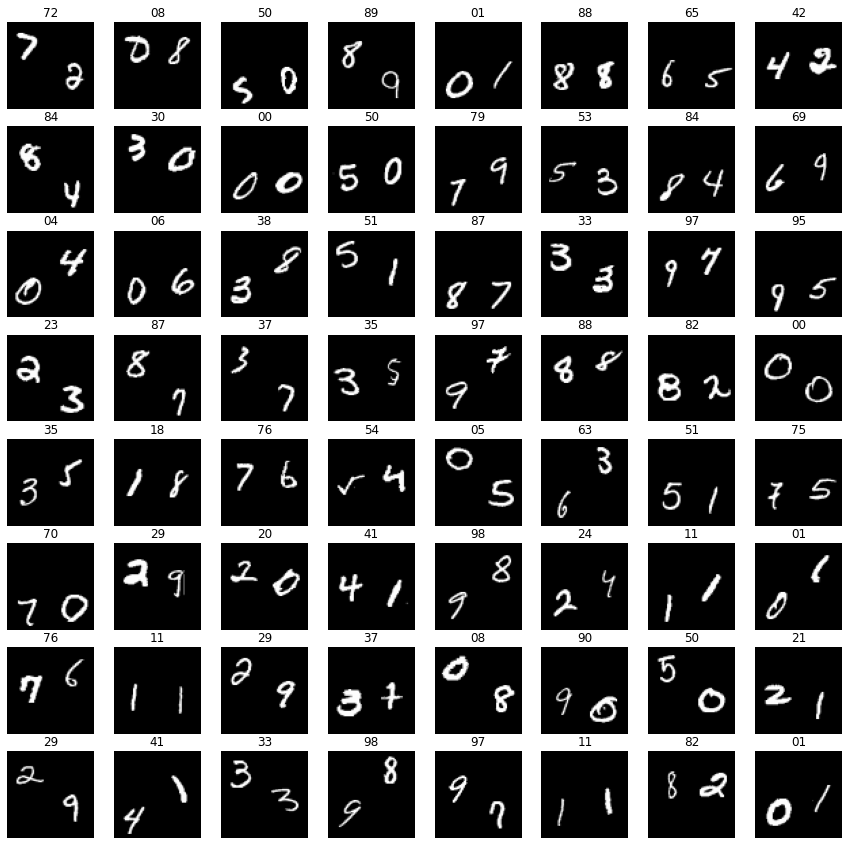

In [ ]:
#Visualize image from 1st batch
class_names = ds_train.class_names

plt.figure(figsize=(15, 15))
for images, labels in ds_train.take(1):
  for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(np.squeeze(images[i]),cmap = 'gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

###1.6.1. Laod and Generate validation dataset

In [ ]:
ds_validation=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64/val/',
    labels='inferred',
    label_mode="int",
    color_mode='grayscale',
    batch_size=Batch_size,
    image_size=(img_height,img_weight),
    shuffle=True,
    seed=123,   
)

Found 16000 files belonging to 16 classes.


###1.6.2. Image visualization from Validation databatch

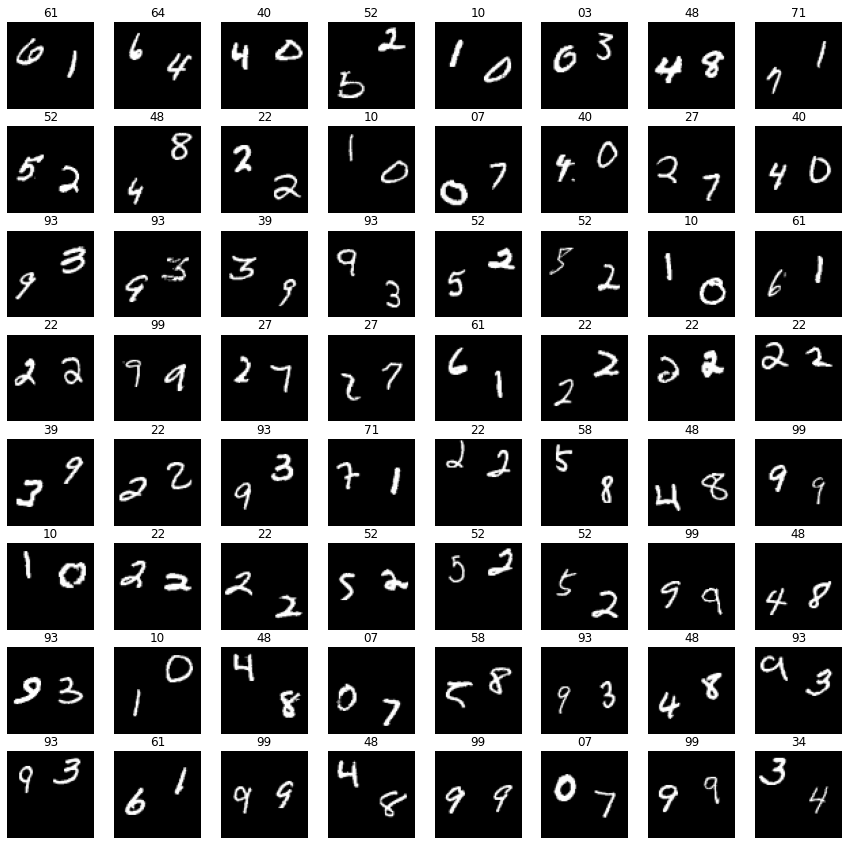

In [ ]:
#Visualize image from 1st single batch
class_names = ds_validation.class_names

plt.figure(figsize=(15, 15))
for images, labels in ds_validation.take(1):
  for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(np.squeeze(images[i]),cmap = 'gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

###1.7.1 Test dataset generator 

In [ ]:
ds_test=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64/test/',
    labels='inferred',
    label_mode="int",
    color_mode='grayscale',
    batch_size=Batch_size,
    image_size=(img_height,img_weight),
    shuffle=True,
    seed=123,
)

Found 20000 files belonging to 20 classes.


###1.7.2. Test databatch visualization

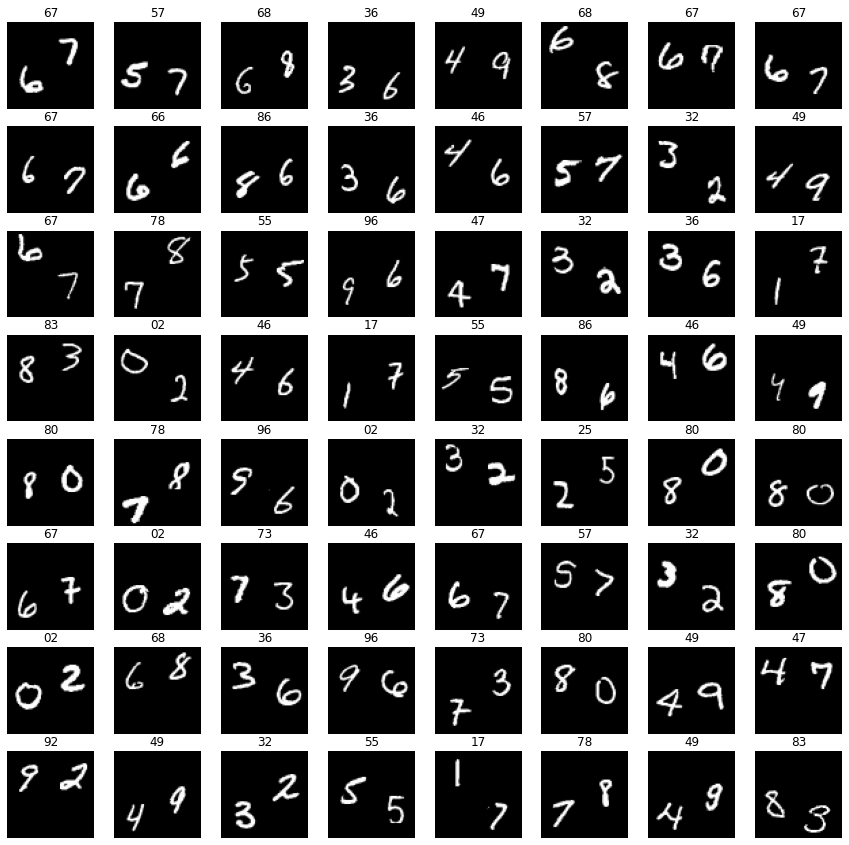

In [ ]:
#Visualize image from 1st batch
class_names = ds_test.class_names

plt.figure(figsize=(15, 15))
for images, labels in ds_test.take(1):
  for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(np.squeeze(images[i]),cmap = 'gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

#Model

###2.1 Architect the CNN model

In [ ]:
Inputs=keras.Input(shape=(64,64,1))
x=layers.Conv2D(32,3,padding='same',kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(Inputs)
x=layers.BatchNormalization()(x)
x=keras.activations.relu(x)

x=layers.Conv2D(64,3,kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(x)
x=layers.BatchNormalization()(x)
x=keras.activations.relu(x)

x=layers.MaxPool2D()(x)

x=layers.Conv2D(64,3,kernel_regularizer=regularizers.l2(WEIGHT_DECAY))(x)
x=layers.Conv2D(128,3,activation='relu')(x)
x=layers.MaxPool2D()(x)

x=layers.Flatten()(x)

x=layers.Dense(1024, activation='relu')(x)
x=layers.Dropout(0.4)(x)
x=layers.Dense(256,activation='relu')(x)

output=layers.Dense(100,name='Output')(x)


In [ ]:
model=keras.Model(inputs=Inputs,outputs=output)

###2.2. Plot the model

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 tf.nn.relu_6 (TFOpLambda)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 62, 62, 64)       256       
 hNormalization)                                           

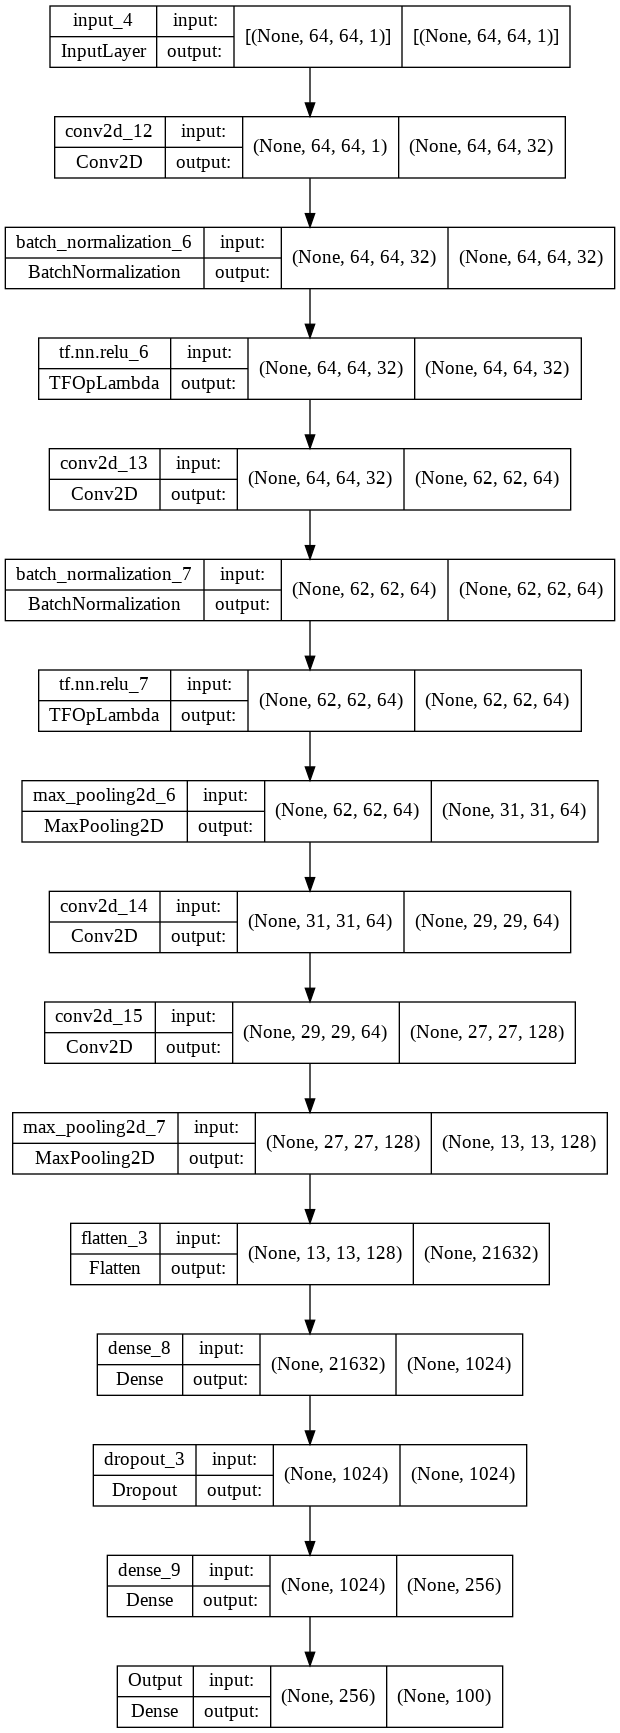

In [ ]:
keras.utils.plot_model(model,'Multiple_digit_classification_model.png',show_shapes=True)

###2.4. Compile the Model

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(LEARNING_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics='accuracy',
)

###2.5. Train the Model

In [ ]:
history=model.fit(ds_train,epochs=3,verbose=1,validation_data=ds_validation)

Epoch 1/3
 999/1000 [============================>.] - ETA: 7s - loss: 0.2916 - accuracy: 0.9368 

In [ ]:
#save the model
model.save('/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64/'+'/model2.h5')

In [ ]:
#Load the model
from tensorflow import keras
# Recreate the exact same model, including its weights and the optimizer
model = keras.models.load_model('/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64'+'/model2.h5')

# Show the model architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 64)       256       
 hNormalization)                                             

###2.6. Model Evaluation

In [ ]:
results=model.evaluate(ds_test,verbose=2)
print("test loss, test acc:", results)

###2.7. Predict the Test results

In [ ]:
for x_test,y_test in ds_test.take(2):
  #Claculated the prediction probabilities
  Y_prediction=model_seq.predict(x_test)
  #Calculate the maximum value for probabilities 
  Y_classes=[np.argmax(element) for element in Y_prediction]
print('Original label:',y_test)
print('Predicted label:',Y_classes)

In [ ]:
#Check the single image result
Put_number = int(input("Enter your Image number [0-9999]: "))
#print('Original Classes :',classes[(Y_test.reshape(-1,))[Put_number]])
#print('Predicted Classes: ',classes[Y_classes[Put_number]])
fig=plt.figure(figsize=(15,2)) 
prediction_plot(x_test,y_test,Y_classes,Put_number)
plt.show()

###2.8. Visualization the predicted results

In [ ]:
#Define a prediction plot model
def prediction_plot(X,Y,predicted_label,index):
  X= X[index]
  Y=Y.numpy()
  label_title1=("Original:"+classes[Y[index]]+', '+"Predicted : "+classes[predicted_label[index]])
  plt.xlabel(label_title1)                
  plt.imshow(X)

In [ ]:
#Visualize the 1st 25 test data label prediction
fig=plt.figure(figsize=(15,10)) 
axes=[] 
for index in range(25):
  axes.append( fig.add_subplot(5,5, index+1) )
  prediction_plot(x_test,y_test,Y_classes,index)
fig.tight_layout()    
plt.show(

In [ ]:
#Visualize image from 1st batch
class_names = ds_test.class_names

plt.figure(figsize=(15, 15))
for images, labels in ds_test.take(1):
  for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(np.squeeze(images[i]),cmap = 'gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Data loader for Mnist_double

###3.1.1. Training dataset generator 

In [ ]:
ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64/train/',
    labels='inferred',
    label_mode="int",
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height,img_weight),
    shuffle=True,
    seed=123,
    
)

Found 64000 files belonging to 64 classes.


###3.1.2. Training databatch image visualization 

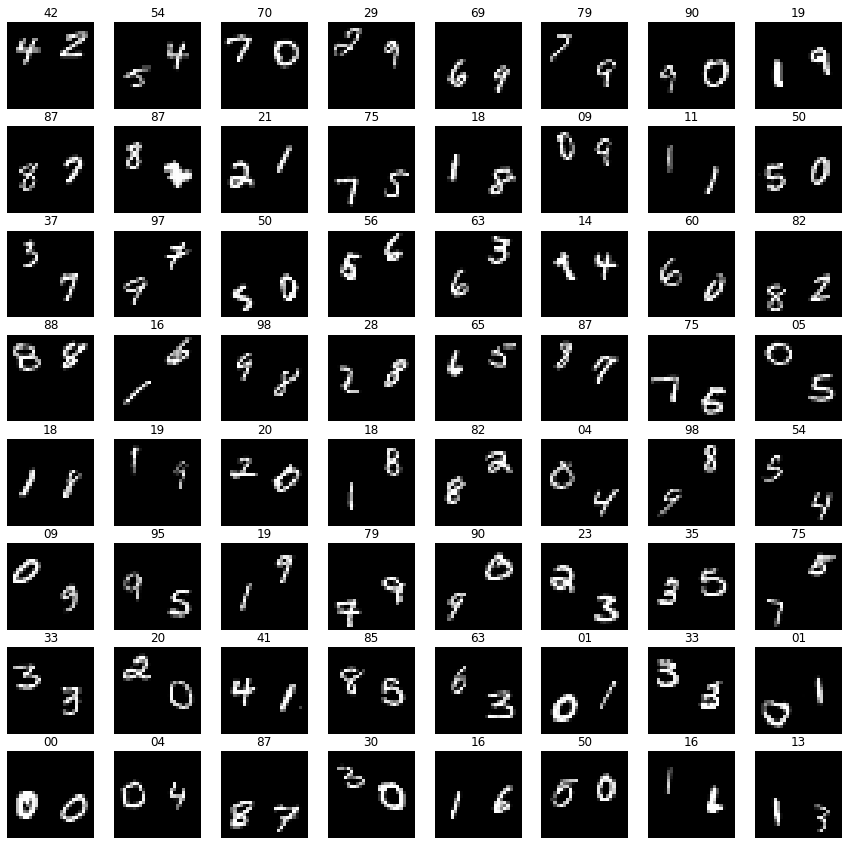

In [ ]:
#Visualize image from 1st batch
class_names = ds_train.class_names

plt.figure(figsize=(15, 15))
for images, labels in ds_train.take(1):
  for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(np.squeeze(images[i]),cmap = 'gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

###3.2.2. Validation databatch image visualization

In [ ]:
ds_validation=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64/val/',
    labels='inferred',
    label_mode="int",
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height,img_weight),
    shuffle=True,
    seed=123,
    
)

Found 16000 files belonging to 16 classes.


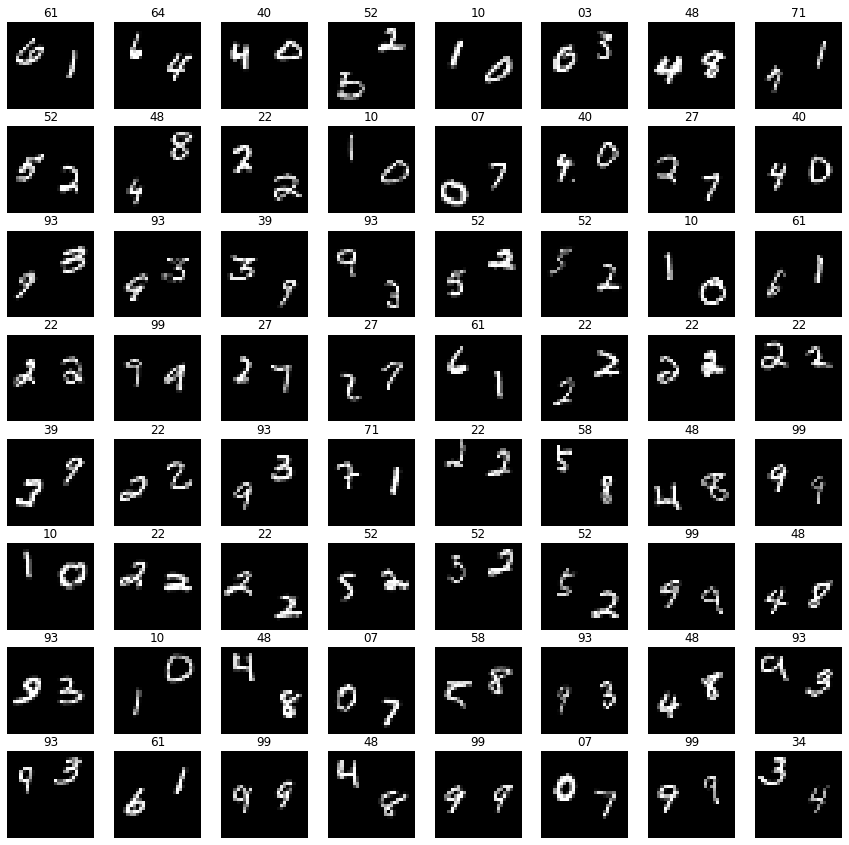

In [ ]:
#Visualize image from 1st single batch
class_names = ds_validation.class_names

plt.figure(figsize=(15, 15))
for images, labels in ds_validation.take(1):
  for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(np.squeeze(images[i]),cmap = 'gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

###3.3.1. Test dataset generator

In [ ]:
ds_test=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64/val/',
    labels='inferred',
    label_mode="int",
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height,img_weight),
    shuffle=True,
    seed=123,
)

Found 16000 files belonging to 16 classes.


###3.3.2. Test databatcht image visualization

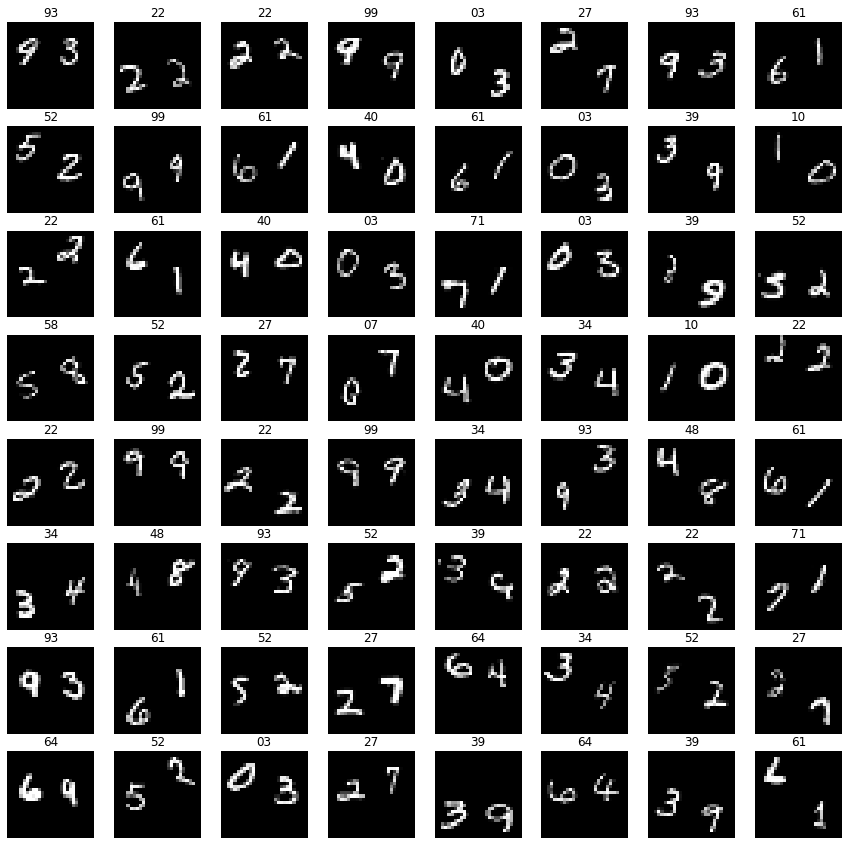

In [ ]:
#Visualize image from 1st batch
class_names = ds_test.class_names

plt.figure(figsize=(15, 15))
for images, labels in ds_test.take(1):
  for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(np.squeeze(images[i]),cmap = 'gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

#DataGenerator Method using ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    zoom_range=(0.99,0.99),
    horizontal_flip=False,
    vertical_flip=False,
    data_format='channels_last',
    dtype=tf.float32,

)
  

In [ ]:
train_generator=datagen.flow_from_directory(
    '/content/drive/MyDrive/Kaggle_dataset/Mnist_multi_digit/double_mnist_seed_123_image_size_64_64/train',
    target_size=(img_height,img_width),
    batch_size=Batch_size,
    color_mode='grayscal',
    class_mode='sparse',# we dont want one-hot-encoding
    shuffle=True,
    seed=123,
)

In [ ]:
def trainning():
  pass

In [ ]:
#custome loops
for epoch in range(10):
  num_batches=0
  for x,y in ds_train:
    num_batches+=1
    #do trainning
    trainning()
    if num_batches==(len(train_dataset/batch_size)):
      break

In [ ]:
from matplotlib.rcsetup import validate_animation_writer_path
#Using step_per_epoch on model.fit()
    model.fit(train_generator,
              epochs=10,
              steps_per_epoch=len(train_dataset/batch_size),
              verbose=1,
              #For vadidation_data
              validation_data=validation_generator,
              validation_step_per_epochs=len(validation_set)/batch_size,
              
              )


#Similar datafolder structure like Hateful meme

In [ ]:
directory='/ /'
df=pd.read_csv(directory+'train.csv')


In [ ]:
file_path=df['file_name'].values
print(filepath)

In [ ]:
labels=df['labels'].values

In [ ]:
ds_train=tf.data.Dataset.from_tensor_slices((file_paths,labels))


In [ ]:
def read_image(image_file,label):
  image=tf.io.read_file(directory+image_file)
  image=tf.image.decode_image(image,channels=1,dtype=tf.float32)
  return image,label

In [ ]:
def augment(image,label):
  #data augmentation
  return image,label

In [ ]:
ds_train=ds_train.map(read_image).map(augment).batch(2)

In [ ]:
for epoch in range(10):
  for x,y in ds_train:
    #train here
    pass

In [ ]:
#Model
#Model_compile

In [ ]:
model.fit(ds_train,
          epochs=10,
          verbose=2)